# $n$-island model with single step population size change

Let us recall the expressions of the c.d.f. and the d.f. of coalescence time in the $n$-island model.

For positive parameters $n \in \mathbb{N}$ (number of islands) and $M$ (migration rate) and $\rho$ the relative population size, the $Q$-matrix generating the process is
$$
    {Q} = \left(
        \begin{array}{ccc}
            -(M + 1/\rho ) & M & 1/\rho \\
            \frac{M}{n-1} & - \frac{M}{n-1} & 0 \\
            0 & 0 & 0
        \end{array}
    \right).
$$
To find the analytical expressions for the densities of $T_2^s$ and $T_2^d$, we will use the equations (10)-(20) in Mazet et al. (2016) and the re-scaling discussed in the appendices of the main document.
Let us define 
$$
    \gamma = \frac{M}{n-1} \rho
$$ 
and
\begin{align*}
    \alpha &= \frac{1}{2 \rho} (1 + n \gamma + \sqrt{\Delta})\\
    \beta &= \frac{1}{2 \rho} (1 + n \gamma - \sqrt{\Delta})
\end{align*}
where $\Delta = (1 + n \gamma)^2 - 4 \gamma$, and $\Delta / 4 \rho^2$ is the discriminant of the characteristic polynomial of $Q$: 
$$
    D: \theta \mapsto \theta^2 + \theta \frac{1 + n \gamma}{\rho} + \frac{\gamma}{\rho^2}. 
$$    
Note that $-\alpha$ and $-\beta$ are the roots of the polynomial $D$.

The, the density functions of $T_2^s$ and $T_2^d$ are
\begin{align*}
    f_{T_2^s}(t) &= a \mathrm{e}^{- \alpha t} + (1-a) \mathrm{e}^{- \beta t} \\
    f_{T_2^d}(t) &= c \mathrm{e}^{- \alpha t} - c \mathrm{e}^{- \beta t}
\end{align*}
where $a = \frac{\gamma - \alpha}{\beta - \alpha}$ and $c = \frac{\gamma}{\beta - \alpha}$. Besides, $\alpha > \beta > 0$ and $\alpha \beta = \gamma/\rho^2$.

The IICR functions of $T_2^s$ and $T_2^d$ are
\begin{align*}
    \mathrm{IICR}_{T_2^s}(t) &= \rho \frac{( 1/\rho - \beta ) \mathrm{e}^{- {\alpha} t} + ( \alpha  - 1/\rho ) \mathrm{e}^{- {\beta} t}}{({\alpha} -{\gamma}/\rho) \mathrm{e}^{- {\alpha} t} + ({\gamma}/\rho - {\beta}) \mathrm{e}^{- {\beta} t}} = \rho \frac{( 1/\rho - \beta ) \mathrm{e}^{- t \sqrt{\Delta}/\rho} + \alpha  - 1/\rho }{({\alpha} -{\gamma}/\rho) \mathrm{e}^{- t \sqrt{\Delta}/\rho}  + {\gamma}/\rho - {\beta} } \\
    \mathrm{IICR}_{T_2^d}(t) &= \rho \frac{{\beta} \mathrm{e}^{- {\alpha} t} - {\alpha} \mathrm{e}^{- {\beta} t}}{ {\gamma}/\rho \, \mathrm{e}^{- {\alpha} t} - {\gamma}/\rho \, \mathrm{e}^{- {\beta} t}} = \rho \frac{{\beta} \mathrm{e}^{- t \sqrt{\Delta}/\rho} - {\alpha} }{ \gamma/\rho ( \mathrm{e}^{- t \sqrt{\Delta}/\rho } - 1) }.
\end{align*}

In [1]:
using Plots

In [3]:
# Defining the parameters
m = 0.5; # migration rate
n = 5.0; # number of islands
ρ = 1; # relative population size
Q = [-(m + 1/ρ)  m 1/ρ ; m/(n-1) -m/(n-1) 0 ; 0 0 0]; # defining the Q-matrix
display(Q) # printing Q

3×3 Matrix{Float64}:
 -1.5     0.5    1.0
  0.125  -0.125  0.0
  0.0     0.0    0.0

In [5]:
function density_anal_nI(t,m, n, ρ)
    # computing the densities using the analytical results
    # see main document for more details
    γ = m/(n-1) * ρ
    Δ = (1+n*γ)^2 - 4 * γ
    α = 1/2*(1 + n*γ + sqrt(Δ)) / ρ
    β = 1/2*(1 + n*γ - sqrt(Δ)) / ρ
    a = (γ/ρ - α)/(β - α)
    c = γ/ρ /(β - α)
    x = a*exp(- α * t) + (1 - a)*exp(- β * t)
    y = c*exp(- α * t) - c*exp(- β * t)
    return [x/ρ,y/ρ]
end

density_anal_nI (generic function with 1 method)

In [6]:
function IICR_anal_nI(t,m, n, ρ)
    # computing the IICRs using the analytical results
    γ = m/(n-1)*ρ
    Δ = (1+n*γ)^2 - 4 * γ
    α = 1/2*(1 + n*γ + sqrt(Δ)) / ρ
    β = 1/2*(1 + n*γ - sqrt(Δ)) / ρ
    a = (γ / ρ - α)/(β - α)
    c =  γ / ρ /(β - α)
    x = ( (1/ρ-β)*exp(-sqrt(Δ)/ρ * t) + α - 1/ρ )/( (α - γ/ρ)*exp(- sqrt(Δ)/ρ * t) + (γ/ρ - β) )
    y = ( β*exp(- sqrt(Δ)/ρ * t) - α )/( γ/ρ*exp(- sqrt(Δ)/ρ * t) - γ/ρ )
    return [x*ρ,y*ρ]
end

IICR_anal_nI (generic function with 1 method)

In [7]:
# auxiliar function to compute the limit of the IICR function when t → ∞
function limit_IICR(m, n, ρ)
    # computing the IICRs using the analytical results
    γ = m/(n-1)*ρ
    Δ = (1+n*γ)^2 - 4 * γ
    β = 1/2*(1 + n*γ - sqrt(Δ)) / ρ
    return β
end

limit_IICR (generic function with 1 method)

## Exponential growth

Let us assume that $\lambda(t) = \mathrm{e}^{-t}$. Thus, 
$$
    \Lambda(t) = \int_0^t \frac{\mathrm{d} x}{\lambda(x)} = \mathrm{e}^t.
$$
Then, we can compute the following explicit expressions for the IICR under the hypothesis of *strong migration* as follows:

\begin{align*}
    \mathrm{IICR}^{(s)}_{\mathrm{SM}}(t) &= \lambda(t) \cdot \mathrm{IICR}_{T_2^s}(\Lambda(t)) = \exp\{-t\} \frac{( 1 - \beta ) \exp\{- {\alpha} \mathrm{e}^t \} + ( \alpha  - 1 ) \exp\{- {\beta} \mathrm{e}^t \} }{ ({\alpha} - \gamma ) \exp\{- {\alpha} \mathrm{e}^t \} + (\gamma - \beta ) \exp\{- {\beta} \mathrm{e}^t \} } \\
    \mathrm{IICR}^{(d)}_{\mathrm{SM}}(t) &= \lambda(t) \cdot \mathrm{IICR}_{T_2^d}(\Lambda(t)) = \exp\{-t\} \frac{ \beta \exp\{- {\alpha} \mathrm{e}^t \} - \alpha \exp\{- {\beta} \mathrm{e}^t \} }{ \gamma \, \exp\{- {\alpha} \mathrm{e}^t \} - \gamma \, \exp\{- {\beta} \mathrm{e}^t \} }.
\end{align*}

For the *weak migration* settings we need to consider the system of differential equations
\begin{align*}
    x'(t) &= -\left(m + \mathrm{e}^{t} \right) x(t) + \frac{m}{n-1} y(t) \\
    y'(t) &= m  x(t) - \frac{m}{n-1} y(t) 
\end{align*}
Then, we get
\begin{align*}
\mathrm{IICR}^{(s)}_{WM}(t) &= \mathrm{e}^{-t} \cdot \frac{x_s(t) + y_s(t)}{x_s(t)}\\
\mathrm{IICR}^{(d)}_{WM}(t) &= \mathrm{e}^{-t} \cdot \frac{x_d(t) + y_d(t)}{x_s(t)}
\end{align*}
where $(x_s, y_s)$ and $(x_d, y_d)$ are solutions of the system of ODE with initial conditions $(x_s(0), y_s(0)) = (1,0)$ and $(x_d(0), y_d(0)) = (0, 1)$, respectively.

In [8]:
# IICR strong migration
function IICR_anal_nI_exp_growth(t,m, n, ρ)
    # computing the densities using the analytical results
    return exp(-t)*IICR_anal_nI(exp(t),m, n, ρ)
end

IICR_anal_nI_exp_growth (generic function with 1 method)

## Strong migration

12.352349955359818

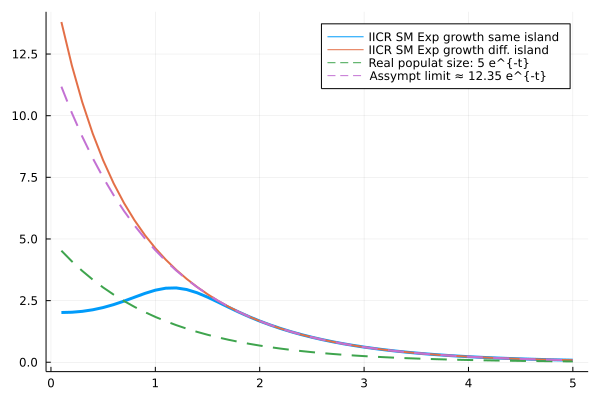

In [10]:
# Strong migration
# 
# Defining the parameters
m = 0.5; # migration rate
n = 5.0; # number of islands
ρ = 1; # relative population size
# 
# Computing β, the eigenvalue related to the limit of the IICR functions
β = limit_IICR(m, n, ρ)
display(1/β)
# 
xs = range(0.1, 5, step = 0.1); # interval of the solutions
f2xs = IICR_anal_nI_exp_growth.(xs,(m,),(n,), (ρ,)); # vector of IICRs
f2xs1 = [x[1] for x in f2xs]; # extract first component
f2xs2 = [x[2] for x in f2xs]; # extract second component
# 
# plotting
fig1 = plot(xs, f2xs1, label="IICR SM Exp growth same island", w = 3, legend = :topright)
fig1 = plot!(xs, f2xs2, label="IICR SM Exp growth diff. island", w = 2)
fig1 = plot!(xs, n*exp.(-xs), label="Real populat size: 5 e^{-t}", w = 2, line =  :dash)
fig1 = plot!(xs, 1/β*exp.(-xs), label="Assympt limit ≈ 12.35 e^{-t}", w = 2, line =  :dash)
display(fig1)
# savefig(fig1,"fig_IICR_EXP_nisland_SM.pdf")

In [11]:
# Weak migration
# First approach
using DifferentialEquations
using Plots
# 
function ODE_exp_growth(du,u,p,t) # defining the ODE system
 du[1] = -(p[1] + exp(t))*u[1] + p[1]/p[2] * u[2]
 du[2] = p[1]*u[1] - p[1]/p[2] * u[2]
end
# 
# defining the initial conditions
u0_same = [1.0; 0.0];
u0_diff = [0.0; 1.0];
#
tspan = (0.0, 10.0); # interval of the solution
p = (m,n-1) # parameters
# defining the ODE system for process starting at state s (both individuals in the same island)
prob_same = ODEProblem(ODE_exp_growth, u0_same, tspan,p);
# defining the ODE system for process starting at state d (both individuals in different islands)
prob_diff = ODEProblem(ODE_exp_growth, u0_diff, tspan,p);
# 
# solving the ODE system for process starting at state s (both individuals in the same island)
sol_same_sol = solve(prob_same, reltol=1e-14, abstol=1e-14);
# extracting each component
x_sol_same = [u[1] for u in sol_same_sol.u];
y_sol_same = [u[2] for u in sol_same_sol.u];
# 
# solving the ODE system for process starting at state d (both individuals in different islands)
sol_diff_sol = solve(prob_diff, reltol=1e-14, abstol=1e-14);
# exatracting each component
x_sol_diff = [u[1] for u in sol_diff_sol.u];
y_sol_diff = [u[2] for u in sol_diff_sol.u];

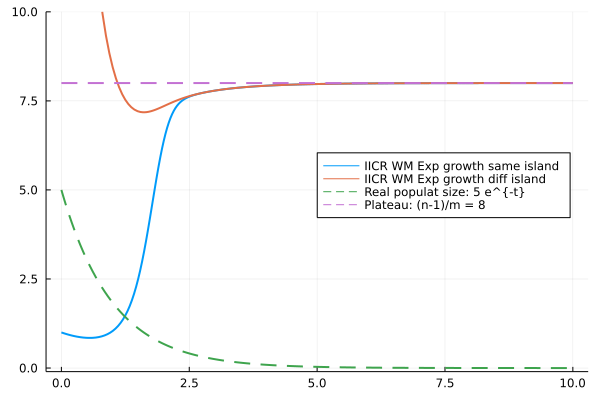

In [13]:
# Plotting
fig1 = plot(sol_same_sol.t, exp.(-sol_same_sol.t).*((x_sol_same + y_sol_same)./x_sol_same) ,
lw=2, label="IICR WM Exp growth same island", legend = :right)
fig1 = plot!(sol_diff_sol.t, exp.(-sol_diff_sol.t).*((x_sol_diff + y_sol_diff)./x_sol_diff) ,
lw=2, label="IICR WM Exp growth diff island")
fig1 = plot!(sol_same_sol.t, n.*exp.(-sol_same_sol.t), label="Real populat size: 5 e^{-t}", w = 2, line = :dash) #, xaxis = :log)
ylims!((-0.1,10))
fig1 = plot!([first(sol_same_sol.t),last(sol_same_sol.t)], [(n-1)/m, (n-1)/m], label="Plateau: (n-1)/m = 8", w = 2, line =  :dash)
display(fig1)
# savefig(fig1,"fig_IICR_EXP_nisland_WM.pdf")
# 

### Another approach

Denote $\varphi = x_s/(x_s + x_d)$ and let us find the EDO satisfied by $\varphi$.
Note that
$$
	\big( x_s(t) + x_d(t) \big)' = - \mathrm{e}^t \; x_s(t).
$$
Then,
\begin{align*}
	\varphi'(t) &= \frac{x_s'(t)(x_s + x_d) - (x_s(t) + x_d(t))' x_s(t)}{(x_s(t) + x_d(t))^2} \\
	&= \frac{\big[- (m + \mathrm{e}^t) x_s(t) + \frac{m}{n-1} x_d(t)\big] \big[x_s(t) + x_d(t)\big] + \mathrm{e}^t x_s^2 }{(x_s + y_s)^2}\\
	&= -(m + \mathrm{e}^t) \varphi(t) + \frac{m}{n-1} (1-\varphi(t)) + \mathrm{e}^t \varphi(t)^2\\
	&= -\left(\frac{m n}{n-1} + \mathrm{e}^t\right) \varphi(t) + \frac{m}{n-1} + \mathrm{e}^t \varphi(t)^2.
\end{align*}
So, we have change our problem to solve the differential equation
$$
	\varphi' = -\left(\frac{m n}{n-1} + \mathrm{e}^t\right) \varphi + \frac{m}{n-1} + \mathrm{e}^t \varphi^2.
$$

The difficulty is still the numerical solution of an EDO.
However, we know that the solution of this system is a bounded function with image in $[0,1]$.
So, its behavior should be nicer.
Let us denote $\varphi_s$ and $\varphi_d$ the solution of \eqref{eq:alternativeEDO} with initial conditions $\varphi_s(0) = 1$ and $\varphi_d(0) = 1$, respectively.
Then, we get
\begin{align*}
	\mathrm{IICR}^{(s)}_{\mathrm{WM}}(t) &= \frac{1}{\mathrm{e}^t \, \varphi_s(t)},\\
	\mathrm{IICR}^{(d)}_{\mathrm{WM}}(t) &= \frac{1}{\mathrm{e}^t \, \varphi_d(t)}.
\end{align*}

Now, let us take back our attention to \eqref{eq:alternativeEDO}.
Assume $\varphi$ converge to a limit when $t \to \infty$.
This limit is necessarily finite because $\varphi$ is bounded.
Then $\varphi' \to 0$, when $t \to \infty$.
This implies that $\varphi \to 0$, when $t \to \infty$.
Indeed, if the limit of $\varphi$ is not null, then $\varphi'$ does not converges to zero.
Besides, the limit of $t \mapsto \mathrm{e}^t \phi$ needs to exist and be finite too.
Then, solving the equation
$$
	\lim\limits_{t \to \infty}\varphi'(t) = - \left( \lim\limits_{t \to \infty} \mathrm{e}^t \varphi \right) + \frac{m}{n-1} = 0,
$$
we get
$$
\lim\limits_{t \to \infty} \mathrm{e}^t \varphi = \frac{m}{n-1}.
$$
Thus, when $t \to \infty$, we have
$$
\mathrm{IICR}^{(s)}_{\mathrm{WM}}(t) \sim \frac{n-1}{m} \;\; \text{ and } \;\; \mathrm{IICR}^{(d)}_{\mathrm{WM}}(t) \sim \frac{n-1}{m}.
$$

In [14]:
# Weak migration
# Second approach
using DifferentialEquations
using Plots
# 
function ODE_exp_growth(du,u,p,t) # defining the ODE system
 du[1] = -( p[1]*(p[2]+1)/p[2] + exp(t))*u[1] + p[1]/p[2] + exp(t)*u[1]^2
end
# 
# defining the initial conditions
u0_same = [1.0];
u0_diff = [0.0];
#
tspan = (0.0, 10.0); # interval of the solution
p = (m,n-1); # parameters
# defining the ODE system for process starting at state s (both individuals in the same island)
prob_same = ODEProblem(ODE_exp_growth, u0_same, tspan,p);
# defining the ODE system for process starting at state d (both individuals in different islands)
prob_diff = ODEProblem(ODE_exp_growth, u0_diff, tspan,p);
# 
# solving the ODE system for process starting at state s (both individuals in the same island)
sol_same_sol = solve(prob_same, reltol=1e-14, abstol=1e-14);
# extracting each component
ϕ_sol_same = [u[1] for u in sol_same_sol.u];
# 
# solving the ODE system for process starting at state d (both individuals in different islands)
sol_diff_sol = solve(prob_diff, reltol=1e-14, abstol=1e-14);
# exatracting each component
ϕ_sol_diff = [u[1] for u in sol_diff_sol.u];
display((n-1)/m)

8.0

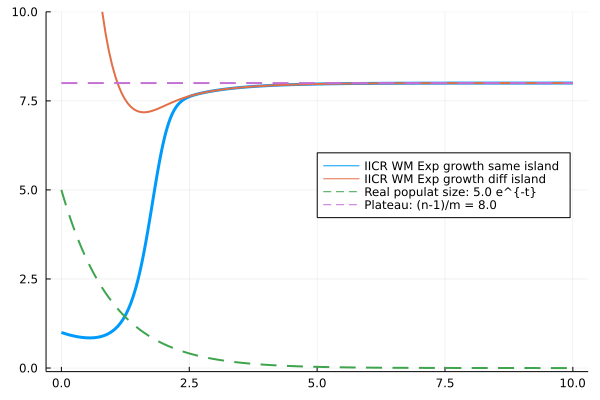

In [17]:
# Plotting
fig1 = plot(sol_same_sol.t, exp.(-sol_same_sol.t)./ϕ_sol_same, lw=3, label="IICR WM Exp growth same island", legend = :right)
fig1 = plot!(sol_diff_sol.t, exp.(-sol_diff_sol.t)./ϕ_sol_diff, lw=2, label="IICR WM Exp growth diff island")
fig1 = plot!(sol_same_sol.t, n.*exp.(-sol_same_sol.t), label="Real populat size: "*string(n)*" e^{-t}", w = 2, line = :dash) #, xaxis = :log)
ylims!((-0.1,10))
fig1 = plot!([first(sol_same_sol.t),last(sol_same_sol.t)], [(n-1)/m, (n-1)/m], label="Plateau: (n-1)/m = "*string((n-1)/m), w = 2, line =  :dash)
display(fig1)
# savefig(fig1,"fig_IICR_EXP_nisland_WM.pdf")